# Iris dataset Classification

In [1]:
import pandas as pd
data = pd.read_csv('data/iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Visualize Data

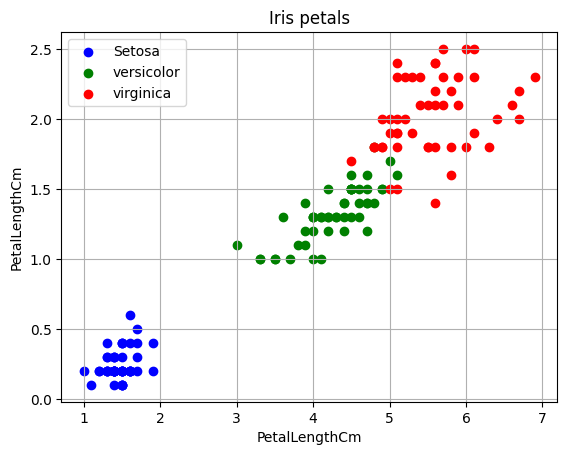

In [137]:
import matplotlib.pyplot as plt
setosa = data[data.Species == 'Iris-setosa']
versicolor = data[data.Species == 'Iris-versicolor']
virginica = data[data.Species == 'Iris-virginica']

fig, ax = plt.subplots(1, 1)
ax.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label="Setosa", facecolor='blue')
ax.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label="versicolor", facecolor='green')
ax.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label="virginica", facecolor='red')

ax.set_xlabel("PetalLengthCm")
ax.set_ylabel("PetalLengthCm")
plt.grid()
ax.set_title("Iris petals")
plt.legend()
plt.show()

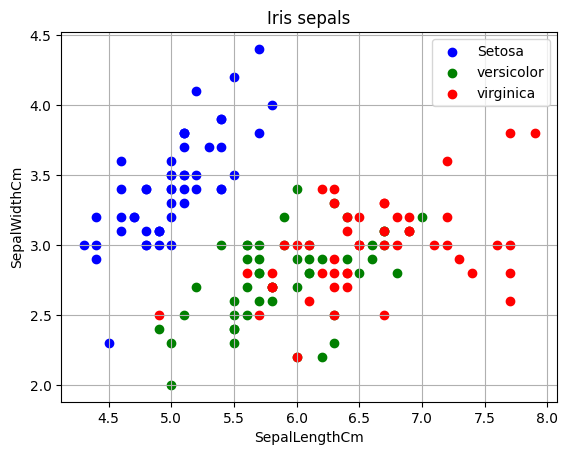

In [139]:
import matplotlib.pyplot as plt
setosa = data[data.Species == 'Iris-setosa']
versicolor = data[data.Species == 'Iris-versicolor']
virginica = data[data.Species == 'Iris-virginica']

fig, ax = plt.subplots(1, 1)
ax.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label="Setosa", facecolor='blue')
ax.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], label="versicolor", facecolor='green')
ax.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], label="virginica", facecolor='red')

ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
plt.grid()
ax.set_title("Iris sepals")
plt.legend()
plt.show()

In [140]:
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
data['Species'] = data['Species'].map(species_mapping)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [141]:
X = data.iloc[:,[1, 2, 3, 4]].values
y = data.iloc[:, [5]].values

print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [142]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Training and Test set

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


### Feature Scaling :

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fitting Logistic Regression to the Training set :

In [145]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression(random_state=0)
logit_reg.fit(X_train, y_train.ravel())
preds_train = logit_reg.predict(X_train)
preds_test = logit_reg.predict(X_test)

## Evaluation On Training and Test Set
### Precision And Recall

Precision answers the question:  
"Out of all the predictions the model made for a particular class, how many were actually correct?"  
Precision focuses on minimizing False Positives. It is useful when the cost of a False Positive is high.  
* In spam detection, if the model predicts an email as spam but it’s not, an important email might be missed. To avoid this we may need high precision.

Recall answers the question:  
"Out of all the actual instances of a class, how many did the model correctly identify?"  
Recall focuses on minimizing False Negatives. It is useful when missing an actual instance has a high cost. 
* In cancer detection, if the model fails to detect a cancer case, the patient might miss critical treatment. We may need high recall. Recall ensures the model identifies as many actual cases as possible.

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_true=y_train, y_pred=preds_train)
print("-------------Training Set:--------------")
print(report)

report = classification_report(y_true=y_test, y_pred=preds_test)
print("-------------Test Set:--------------")
print(report)

-------------Training Set:--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

-------------Test Set:--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [149]:
print("-------------Training Set:--------------")
con_mat = confusion_matrix(y_true=y_train, y_pred=preds_train)
print(con_mat)

print("-------------Test Set:--------------")
con_mat = confusion_matrix(y_true=y_test, y_pred=preds_test)
print(con_mat)

-------------Training Set:--------------
[[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
-------------Test Set:--------------
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
